<a href="https://colab.research.google.com/github/remziyeer/CLUSTERING/blob/main/Shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import shap
import xgboost
from sklearn import datasets

In [26]:
X=pd.read_csv("Iris.csv")
#Alakasız sütunları silmek
drop_features = ['Species']
X = X.drop(drop_features, axis = 1)
y= X.Id.copy() 
X = X.drop('Id', axis = 1)
# Varsa eksik değerlerin işlenmesi
X.fillna(method ='ffill', inplace = True)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [28]:
cls = RandomForestClassifier(max_depth=2, random_state=0)
cls.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

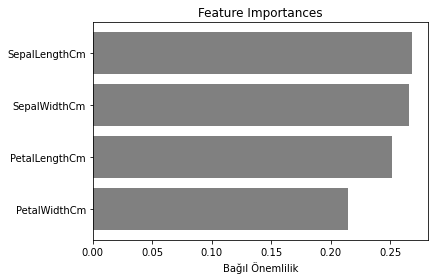

In [29]:
importances = cls.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='grey', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Bağıl Önemlilik')
plt.show()

Confusion matrix(karışıklık matrisi)

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


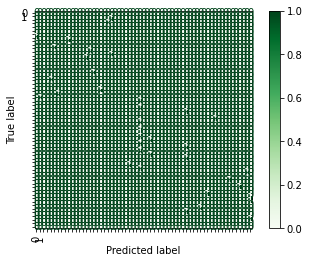

In [30]:
class_names = ['0', '1']
disp = plot_confusion_matrix(cls, X_test, y_test, display_labels=class_names, cmap=plt.cm.Greens, xticks_rotation='vertical')

In [31]:
y.value_counts()

1      1
95     1
97     1
98     1
99     1
      ..
51     1
52     1
53     1
54     1
150    1
Name: Id, Length: 150, dtype: int64

In [32]:
explainer = shap.TreeExplainer(cls)
shap_values = explainer.shap_values(X)

SHAP Summary Plot

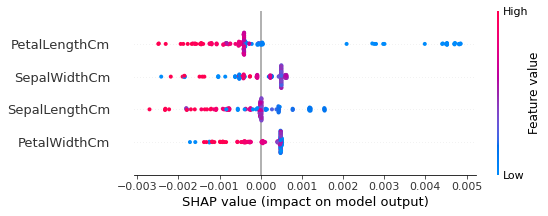

In [34]:
shap.summary_plot(shap_values[1], X.values, feature_names = X.columns)

SHAP Dependence Plot(bağımlılık grafiği)

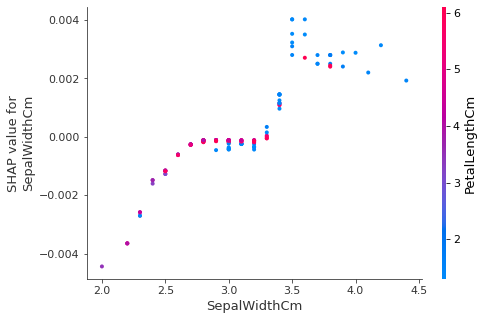

In [35]:
shap.dependence_plot(1, shap_values[0], X.values, feature_names=X.columns)

SHAP Force plot(shap gücü grafiği)

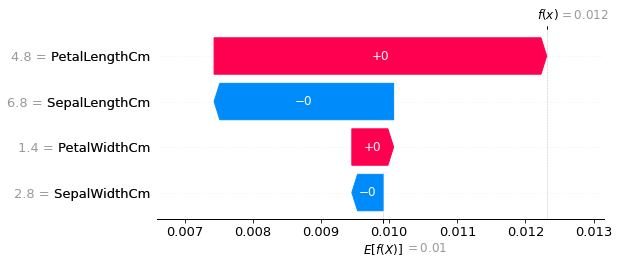

In [36]:
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))